<h1>Prompt Image Matching Process</h1>

In [33]:
import dill as pickle

with open('models/image_recommender_model_florence_long_word2vectfidf_files.pkl', 'rb') as f:
    system_image_recommender = pickle.load(f)
    sys_tagged_sample_df = pickle.load(f)
    text_preprocess = pickle.load(f)
    sys_X_emb = pickle.load(f)
    sys_text2emb = pickle.load(f)

In [34]:
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity 

import gensim.downloader
# Show all available models in gensim-data
gensim_pretrains = list(gensim.downloader.info()['models'].keys())
word2vec_model = gensim.downloader.load(gensim_pretrains[3])

In [37]:
tagger = 'florence_long'
text_in = 'sleeping soccer'
output_df = system_image_recommender(sys_tagged_sample_df,tagger,[],sys_X_emb,text_in,
                                     sys_text2emb,thr_=0.0,top_n=10)
output_df

,file_name,florence_long,sim
22,9ab7167032734f328a1c2b6a2d582b40.jpg,The image shows three different types of sport...,0.574373
306,cf1b3f89da12406eadfce11069c8fc8f.jpg,The image shows a living room scene with three...,0.498271
367,1e4be131788d40f9b89ea96fbc66e781.jpg,The image shows a young man kneeling on a gras...,0.469394
84,4c9810f743004d44afe987cf7166a876.jpg,The image shows a young girl lying on a grassy...,0.458035
99,503e25409f03453e81781a9574cc7f99.jpg,The image shows a young man kneeling on a gras...,0.456688
372,45aef3a8801147638244a3a8019f9801.jpg,The image shows a middle-aged couple sitting o...,0.454043
142,428c492687494ef7b42b33889a61c914.jpg,The image shows a man standing on a golf cours...,0.427855
479,d5c905d61206400c9a6108a10643c895.jpg,The image shows a young woman sitting on a gre...,0.422810
149,f1796d88810c4bc2b6c75edc1f46f06f.jpg,The image shows a young African-American boy s...,0.421633
377,cd1e6f09865742ef969159e627d70944.jpg,"The image shows a group of four young people, ...",0.420402


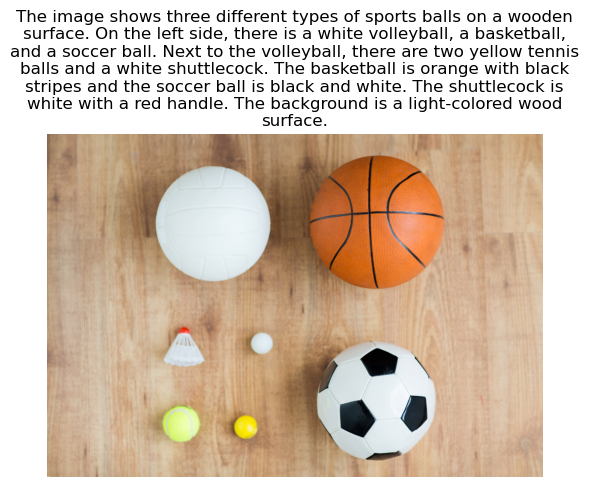

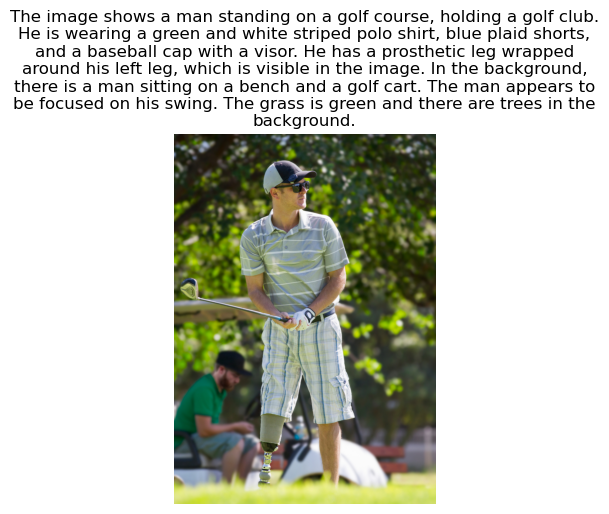

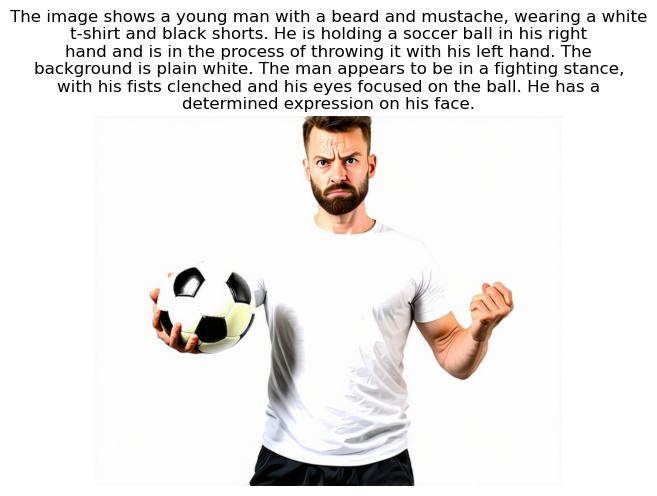

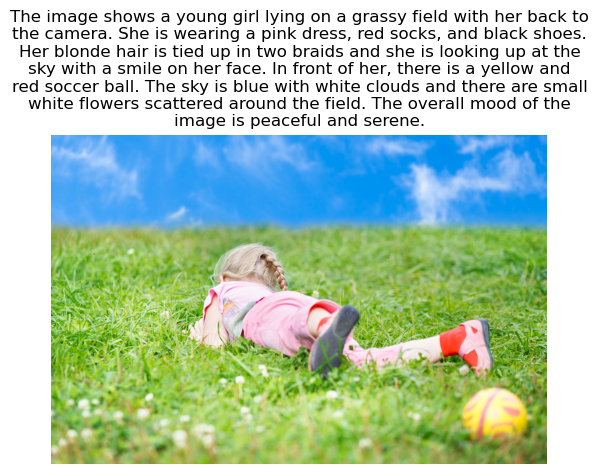

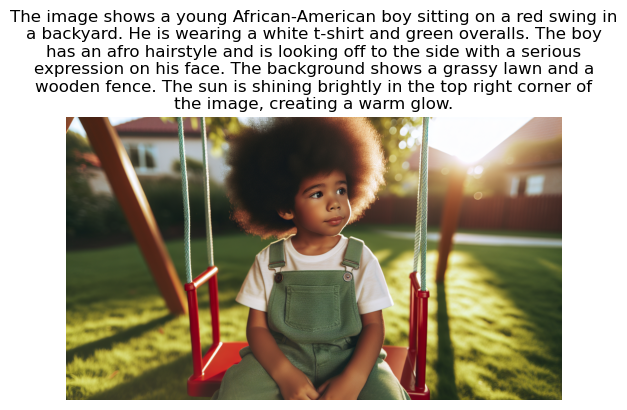

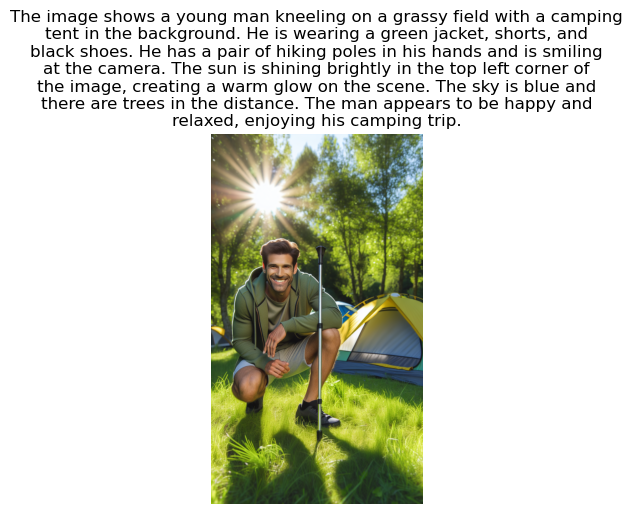

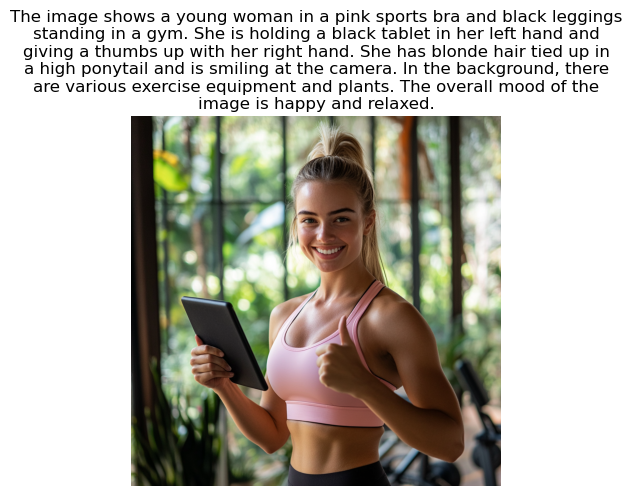

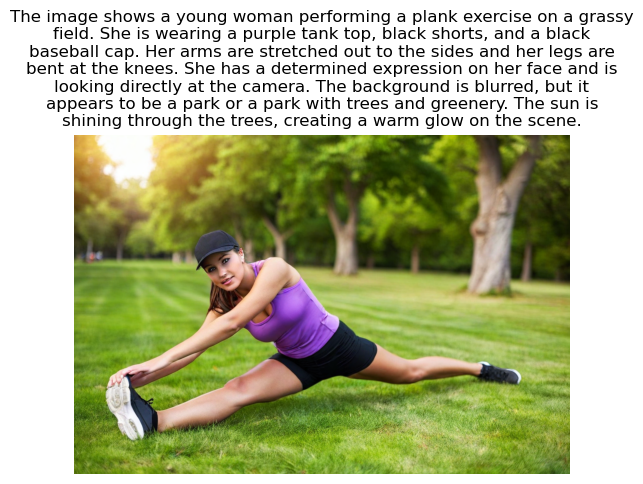

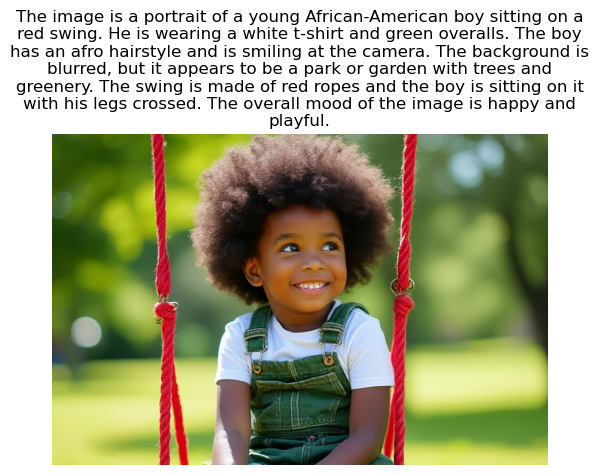

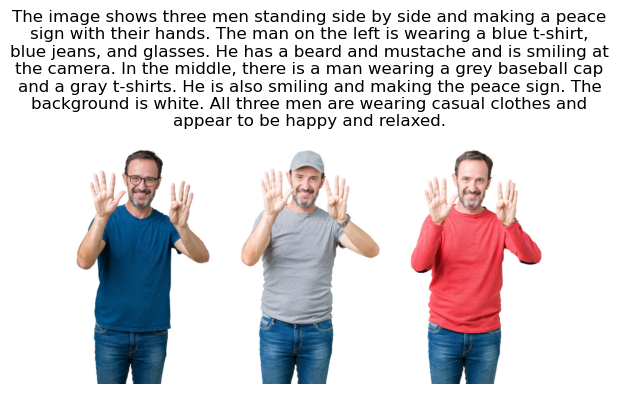

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(len(output_df)):
    image_name = output_df.iloc[i].file_name
    image_tag =  output_df.iloc[i].florence_long
    image_filename = '../sample_imagesv2/'+image_name
    img = mpimg.imread(image_filename)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_tag)
    plt.show()